<a href="https://colab.research.google.com/github/zfathii/bismillah/blob/main/Data%20Analysis%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Data Project: [E-Commerce Public Dataset]
- **Name:** Fathimah Zulfah
- **Email:** fathimahzulfah.2022@student.uny.ac.id
- **ID Dicoding:** fathimah_zulfah

## Defining Business Questions

- Which product has the highest sales volume? Are they generating more profit from low-priced items or high-priced ones?
- What is the average spending of customers, and does this amount differ based on their geographical location?
- Which geographic location has the most customers?

## Preparing the required libraries

In [6]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

## **A. Data Wrangling**

### **A.1. Gathering Data**

In [9]:
# Clone the GitHub repository
!git clone https://github.com/zfathii/bismillah.git
import os

# Directory containing the CSV files
data_dir = "/content/bismillah/data/"
os.chdir(data_dir)

# opening datasets individually (ignored customers and sellers)
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
items = pd.read_csv(data_dir + 'order_items_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')
category = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'orders': orders,
        'items': items,
        'products': products,
        'payments': payments,
        'reviews': reviews,
        'customers': customers,
        'sellers': sellers,
        'geo': geolocation,
        'category': category}

Cloning into 'bismillah'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 5), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 42.73 MiB | 13.67 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (12/12), done.


In [10]:
data['customers'].head() #display the first few rows of the customers dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [11]:
data['geo'].head() #display the first few rows of the geology dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
data['payments'].head() #display the first few rows of the payments dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [13]:
data['reviews'].head() #display the first few rows of the reviews dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [14]:
data['orders'].head() #display the first few rows of the orders dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [15]:
data['products'].head() #display the first few rows of the products dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
data['sellers'].head() #display the first few rows of the sellers dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [17]:
data['category'].head() #display the first few rows of the category dataset

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- I can analyze how the data is distributed can provide initial insights into the characteristics of various fields
- By loading and previewing the datasets using commands like .head(), I can understand the structure of the data, such as the number of columns, column names, and data types.

### **A.2. Assessing Data**

#### A.2.1 Check for All of The Data Types

In [19]:
# Assess the data types and other metadata of all the DataFrames stored in the data dictionary
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

In [20]:
# Convert columns in 'orders' to datetime format
datetime_oo = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_oo:
    data['orders'][column] = pd.to_datetime(data['orders'][column])

# Convert columns in 'items' to datetime format
datetime_oi = ["shipping_limit_date"]
for column in datetime_oi:
    data['items'][column] = pd.to_datetime(data['items'][column])

# Convert columns in 'reviews' to datetime format
datetime_or = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_or:
    data['reviews'][column] = pd.to_datetime(data['reviews'][column])


#### A.2.2 Check for Duplicates

In [21]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
orders,99441,0
items,112650,0
products,32951,0
payments,103886,0
reviews,99224,0
customers,99441,0
sellers,3095,0
geo,1000163,261831
category,71,0


#### A.2.3 Check for Missing Values

In [22]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

products 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
d

**Insight:**
- I ensured that all columns have the correct data types, preventing errors in calculations.
- Identifying duplicates helped me maintain data quality by ensuring each record is unique and relevant.
- Checking for missing values allowed me to recognize gaps in the dataset, guiding me on how to handle them effectively.

### **A.3. Cleaning Data**

#### A.3.1 Order

This dataset is crucial because it serves as a linking table and is associated with many other datasets through the order_id.

In [26]:
# For this analysis I will only select orders that have actually been delivered.
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [25]:
print('Focusing solely on delivered orders, we still obtain ' +
      str(round((data['orders'].order_status.value_counts()['delivered']/len(data['orders']))*100,2)) +
      '% of data.')

Focusing solely on delivered orders, we still obtain 97.02% of data.


In [31]:
# First, retrieve all order_ids where the order status is 'delivered'
delivered = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# Now, filter each dataframe where order_id is a foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace=True)

In [32]:
# Identify and quantify missing values (NaNs) in each dataset
for key, value in data.items():
    for col in value.columns:
        # Print column names with NaN values along with their percentage
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


In [33]:
# Addressing missing values in the orders dataset
# Observing that the NaNs in the orders dataset are not overlapping,
# the focus is primarily on the delivered_customer_date.
missing_delivery_dates = data['orders'].order_delivered_customer_date.isnull().sum()
print(f'There are {missing_delivery_dates} orders missing delivery dates.')

There are 8 orders missing delivery dates.


In [34]:
# Drop the entries in the same way as before
# First, retrieve all order_ids where the delivery date is null
null_deliveries = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# Now, filter each dataframe where order_id is a foreign key
for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace=True)


In [35]:
# The focus is not on the actual date of delivery, but rather on whether it was delivered on time
data['orders']['delivered_on_time'] = np.where(
    data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'],
    'On Time',
    'Late'
)

* The analysis highlights whether orders are delivered on time, providing insights into the efficiency of the delivery process.
* By categorizing deliveries as "On Time" or "Late," it becomes easier to evaluate the performance of logistics and identify areas for improvement.

#### A.3.2 Reviews

In [36]:
print('Review columns:', data['reviews'].columns.values)

# The review_comment_title column contains 88% NaN values, so it will be dropped.
# Note: NaNs in reviews may indicate the absence of comments.
# Might assume that's all there is and use the data separately for the next analysis.

# Dropping the column related to the review title
review_drop_cols = ['review_comment_title']
data['reviews'].drop(review_drop_cols, axis=1, inplace=True)


Review columns: ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [37]:
# For now, no text analysis will be conducted, so the focus is not on the comment message.
# This column contains NaNs for entries where people did not leave a review.
# Instead of dropping the column, NaNs will be replaced with 0, and existing reviews will be marked as 1.
data['reviews']['review_comment_message'] = np.where(data['reviews']['review_comment_message'].isnull(), 0, 1)


The presence of reviews can be quantified, allowing for the analysis of customer engagement. By converting reviews into binary values (0 for no review and 1 for a review), it becomes easier to assess customers' feedback.

#### A.3.3 Products

In [38]:
print('Product columns:', data['products'].columns.values)

# It has been determined that the length of the name and description of the product are not of interest due to a high number of NaNs.
# Additionally, there are no clear applications for the size attributes of each product.
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

# Dropping the specified columns from the products DataFrame
data['products'].drop(product_drop_cols, axis=1, inplace=True)


Product columns: ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']


In [43]:
# After reviewing an extensive list of product categories,
# it is reasonable to assume that NaNs in these columns can be replaced with 'other'.
data['products']['product_category_name'].fillna(value='outro', inplace=True)

In [46]:
# There are currently no zeros in the photos_qty column, but it's unlikely that there are no products with zero photos.
# Therefore, NaNs in this column will be replace NaNs in the product_photos_qty column with zero
data['products']['product_photos_qty'] = data['products']['product_photos_qty'].fillna(value=0)

By analyzing the product_photos_qty, I can identify how many products lack images, which potentially impacting customer interest and sales.

#### A.3.4. Geology

In [47]:
# Eliminate duplicate entries from the geolocation dataset
data['geo'] = data['geo'].drop_duplicates()

Eliminating duplicate entries in the geolocation dataset improves data accuracy and reliability

**Insight:**
- Cleaning up missing values and duplicates enhances accuracy and data quality.
- Standardized date formats and categories enable effective time-based and categorical analyses.
- Filtering to relevant records ensures analyses concentrate on actionable insights.

## **B. Exploratory Data Analysis (EDA)**

### **B.1 Explore Customers**

In [48]:
# Randomly select 5 samples from the 'customers' DataFrame
data['customers'].sample(n=5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25144,dbdc5f4edc37f3f149e239e4a3880a97,e8c5dfe905d9613124f527839d4a002e,66615,belem,PA
83341,7d0e8b3cece66d111fc2d6921b068abd,7ff16ad2e795bbfc09bd07c19f45712a,18480,itaporanga,SP
85113,c4fd402d92b11f47ef07a2412e96fdf0,39370dae1e24d5b30613cab35e7cf58c,25510,sao joao de meriti,RJ
39215,b4a44120b7b9e503fc473b953771df90,6603603a63305f833777f313da23b3cc,54735,sao lourenco da mata,PE
75602,c5a54a265ffa05e5bd698a976d9fd9ed,f25c83fef4ae7252feec416e7927acac,58030,joao pessoa,PB


In [49]:
# Group by 'customer_city' and count unique 'customer_id', then sort the values in descending order
data['customers'].groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [50]:
# Group by 'customer_state', count unique 'customer_id', and sort in descending order
data['customers'].groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


I discovered that customer distribution varies significantly by state, with certain regions having a much higher concentration of unique customers than others.

### **B.2 Explore Payments**

In [51]:
# Randomly select 5 samples from the 'payments' DataFrame
data['payments'].sample(n=5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57307,ed0c78512dc9e32eb0120ff13b93a8fb,1,credit_card,5,268.76
70700,7e50d85d90ed82feaf9011470ce9e36e,1,credit_card,1,47.06
103350,95a7802de396f3df0c682ddafc8f3152,1,credit_card,1,76.79
84454,95a74a28d622001aafb5dd088ea0d88c,1,credit_card,5,50.68
95224,727be733cb840c05e9fc14028a1892e2,1,credit_card,4,477.77


In [54]:
# Group by 'payment_type', count unique 'order_id', and sort in descending order
data['payments'].groupby('payment_type')['order_id'].nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


I found that certain payment methods, particularly credit cards, are used significantly more frequently than others for completing orders.

### **B.3 Explore Orders**

In [55]:
# Randomly select 5 samples from the 'orders' DataFrame
data['orders'].sample(n=5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
93644,4c8f39a65890981ff48b24f1899db560,3ce54c43e38d4e8ba10df6973a306677,delivered,2017-09-13 18:10:19,2017-09-13 18:25:44,2017-09-14 18:10:10,2017-09-25 16:52:12,2017-10-06,On Time
79103,e8ea590efa98677641fd4094dea4ebe1,0f26de186a9840155f45c0a930f78dd8,delivered,2018-03-27 21:10:39,2018-03-27 22:10:21,2018-03-29 19:12:10,2018-04-02 18:48:37,2018-04-13,On Time
71884,279f4b9e7b2a4b2b98c0d8c8a8f2a4b2,5be52c6dec12c72dc02ac315ae57a221,delivered,2017-08-22 11:39:48,2017-08-22 11:50:49,2017-08-24 14:13:07,2017-09-16 17:17:53,2017-09-18,On Time
79190,8e65fdbf220572dfd3430631b5d89947,de2425c7317b3c9ecf9a1a31da719569,delivered,2017-07-26 17:36:36,2017-07-26 17:50:18,2017-07-27 18:33:25,2017-08-04 20:34:37,2017-08-21,On Time
88310,b70b7c8ce83925f3477f223f0997f0fd,83664b90cbc9021dc475957df7cd4144,delivered,2018-04-14 19:05:41,2018-04-14 19:31:25,2018-04-16 23:05:31,2018-04-17 23:08:31,2018-05-02,On Time


In [56]:
# Get descriptive statistics for the 'delivered_on_time' column in the 'orders' DataFrame
data['orders']['delivered_on_time'].describe()

,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


I found that the analysis of orders reveals the distribution of timely versus late deliveries, highlighting the overall efficiency of the order fulfillment process.

### **B.4 Explore customers_df & orders_df**

- Merge customers and orders

In [58]:
# Merging the customers and orders dataframes based on the customer_id
customers_orders_df = pd.merge(
    left=data['customers'],  # The left dataframe containing customer information
    right=data['orders'],    # The right dataframe containing order information
    how="left",              # Using a left join to include all customers even if they have no orders
    left_on="customer_id",   # The key column from the customers dataframe
    right_on="customer_id"   # The key column from the orders dataframe
)

# Displaying the first few rows of the merged dataframe
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


- Merge payments & reviews

In [60]:
# Merging the payments and reviews dataframes based on the order_id
payments_reviews_df = pd.merge(
    left=data['payments'],    # The left dataframe containing payment information
    right=data['reviews'],    # The right dataframe containing review information
    how="left",               # Using a left join to include all payments even if they have no reviews
    left_on="order_id",       # The key column from the payments dataframe
    right_on="order_id"       # The key column from the reviews dataframe
)

# Displaying the first few rows of the merged dataframe
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


In [61]:
# Sorting the payments_reviews_df dataframe by payment_value in descending order
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


In [62]:
# Grouping the payments_reviews_df dataframe by payment_type and aggregating unique order_id count and payment_value min/max
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

*   Merge customers_orders & payments_reviews

In [63]:
# Merging the customers_orders_df and payments_reviews_df dataframes on order_id to create customers_df
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


- I understood purchasing patterns that can inform marketing strategies.
- I identified insights into delivery timeliness, which helps pinpoint areas for logistics improvement.
- I analyzed payment methods across demographics, aiding in targeted promotions.

### **B.5 Explore Items & Sellers**

*   Merge items & sellers

In [64]:
# Merging the items and sellers dataframes on seller_id to create item_seller_df
item_seller_df = pd.merge(
    left=data['items'],
    right=data['sellers'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [65]:
# Grouping the item_seller_df by seller_city to count unique sellers and sorting in descending order,
# then displaying the top 10 cities with the most unique sellers.
item_seller_df.groupby("seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
ibitinga,49
guarulhos,48
santo andre,44
maringa,40


In [66]:
# Grouping the item_seller_df by seller_state to count unique sellers and sorting in descending order,
# then displaying the top 10 states with the most unique sellers.
item_seller_df.groupby("seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163
RS,125
GO,39
DF,30
ES,22


I found that exploring the relationship between items and sellers reveals key geographical areas with a high concentration of sellers, which can inform strategic decisions for market expansion or targeted marketing efforts.

### **B.6 Explore Products & Category**

*   Merge products & category

In [67]:
# Merging the products DataFrame with the category DataFrame
# based on the product_category_name to create a comprehensive product_df
product_df = pd.merge(
    left=data['products'],
    right=data['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()  # Displaying the first few rows of the merged DataFrame

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [69]:
# Grouping the product_df by product_category_name to count unique product_ids
# and sorting the result in descending order to find the top 10 categories
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [70]:
# Grouping the product_df by product_category_name_english to count unique product_ids
# and sorting the result in descending order to find the top 10 categories
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


- Merge item_seller_df & product_df

In [71]:
# Merging product_df with item_seller_df to create sellers_df.
# This merge uses product_id as the key for the left join,
# allowing access to both product and seller information associated with each product.
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


In [72]:
# Sorting the sellers_df DataFrame by price in descending order to identify the most expensive products.
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [73]:
# Grouping the sellers_df DataFrame by product category name in English and aggregating to find the unique order counts and the minimum and maximum prices.
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price": ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

I found that certain categories generate more unique orders than others, indicating their popularity and demand. Additionally, there is a range in pricing across different categories, which suggests varying market segments and potential for targeted marketing strategies.

### **B.7 Explore Geology**

In [74]:
# Retrieve a random sample of 5 rows from the 'geo' DataFrame, which contains geographic data.
data['geo'].sample(n=5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
277847,12460,-22.741010,-45.594333,campos do jordao,SP
443734,22231,-22.934805,-43.184144,rio de janeiro,RJ
773912,68701,-1.198667,-47.180180,capanema,PA
952652,92130,-29.956887,-51.164082,canoas,RS
867247,84070,-25.081503,-50.178078,ponta grossa,PR


In [75]:
# Grouping the 'geo' DataFrame by the 'geolocation_zip_code_prefix' column,
# counts the number of occurrences for each zip code prefix, and sorts the results in descending order.
data['geo'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [76]:
# Display the first few rows of the geo dataset where the zip code prefix is 24230
data['geo'][data['geo']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


 I gain insights into the distribution of customers based on their zip code prefixes, which helps identify key geographic areas with the highest customer concentration.

### **B.8 Explore All Data**

- Merge all data

In this case I did not combine the geolocation dataset, because I don't think this dataset is really necessary.

In [77]:
# Merging customers_df and sellers_df to create all_data
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Displaying the first 20 rows of the merged data
all_data.head(20)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


In [79]:
# Removing duplicate entries based on the order_id from all_data
all_data_df = all_data.drop_duplicates('order_id')

In [80]:
# Displaying a summary of the DataFrame, including the index, data types, and non-null values
all_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

In [81]:
# Grouping the data by customer state to get the number of unique orders and total payment values,
# then sorting the results by total payment value in descending order
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",    # Counting unique order IDs
    "payment_value": "sum"    # Summing payment values
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


In [82]:
# Grouping the data by product category in English to get the number of unique orders
# and the minimum and maximum review scores for each category
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",        # Counting unique order IDs
    "review_score": ["min", "max"]  # Finding the minimum and maximum review scores
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

Convert all_data_df to .csv

In [83]:
# Specify the path where to save the CSV file in the correct directory
output_csv_path = "bismillah/data/df.csv"

# Save the all_data to a CSV file without the index
all_data_df.to_csv(output_csv_path, index=False)

**Insight:**

Through my exploration of the dataset, I gained valuable insights into customer distribution across cities and states, revealing key areas for targeted marketing. I analyzed payment preferences, order timeliness, and product popularity, providing a clear understanding of customer behavior and inventory management. Additionally, assessing seller performance highlighted potential partnerships, while geographical mapping unveiled trends for regional marketing. Overall, these insights will guide strategic decisions in marketing, inventory, and customer engagement.


## **C. Visualization & Explanatory Analysis**

### Question 1: *Which product has the highest sales volume? Are they generating more profit from low-priced items or high-priced ones?*

In [84]:
# Merge the products dataset with the items dataset based on the schema
items_product = data['items'].merge(data['products'], on='product_id', how='inner')

# Merge the orders dataset with the items_product dataset
orders_ip = data['orders'].merge(items_product, on='order_id', how='inner')

# Create a pivot table to aggregate the number of items bought and the mean price
product_revenue = orders_ip.pivot_table(index=['product_id'], aggfunc={'order_item_id': 'sum', 'price': 'mean'})

# Calculate total revenue for each product
product_revenue['total'] = product_revenue['order_item_id'] * product_revenue['price']

# Rename columns for clarity
product_revenue.rename(columns={'order_item_id': 'sell_probability'}, inplace=True)

# Normalize the sell probability by the total number of products
product_revenue['sell_probability'] = product_revenue['sell_probability'] / len(product_revenue)

# Sort the product revenue data by total revenue in descending order
product_revenue.sort_values(by='total', ascending=False)

,sell_probability,price,total
product_id,,,
bb50f2e236e5eea0100680137654686c,0.006643,327.628866,70112.577320
5769ef0a239114ac3a854af00df129e4,0.001118,1680.000000,60480.000000
6cdd53843498f92890544667809f1595,0.004998,350.668627,56457.649020
d1c427060a0f73f6b889a5c7c61f2ac4,0.011082,137.411325,49055.843133
99a4788cb24856965c36a24e339b6058,0.016484,88.154423,46809.998868
...,...,...,...
8a3254bee785a526d548a81a9bc3c9be,0.000124,0.850000,3.400000
2e8316b31db34314f393806fd7b6e185,0.000031,2.990000,2.990000
680cc8535be7cc69544238c1d6a83fe8,0.000031,2.900000,2.900000


**Plotting product selling probability, price and revenue**

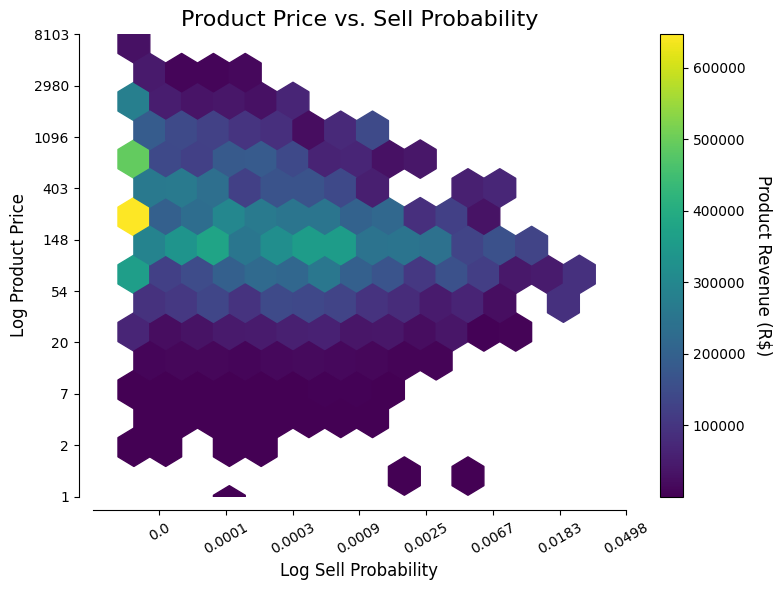

In [87]:
# Custom function to set the design of the plot
def custom_plot(ax, spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # Move specified spines outward
        else:
            spine.set_color('none')  # Hide other spines
    ax.xaxis.set_ticks_position('bottom')  # Set ticks position for x-axis
    ax.yaxis.set_ticks_position('left')    # Set ticks position for y-axis

# Prepare data for plotting
x = np.log(product_revenue.sell_probability)  # Logarithmic transformation of sell probability
y = np.log(product_revenue.price)              # Logarithmic transformation of product price

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))
custom_plot(ax, ['bottom', 'left'])  # Apply custom plot design

# Set the title and labels for the plot
plt.title('Product Price vs. Sell Probability', fontsize=16)
plt.xlabel('Log Sell Probability', fontsize=12)
plt.ylabel('Log Product Price', fontsize=12)

# Define the limits for the x and y axes
plt.xlim(-11, -3)
plt.ylim(0, 9)

# Set ticks for the y-axis with exponential labels
plt.yticks(range(10), [int(np.exp(x)) for x in range(10)], fontsize=10)
# Set ticks for the x-axis with exponential labels and rotation
plt.xticks(range(-10, -2), [round(np.exp(x), 4) for x in range(-10, -2)], fontsize=10, rotation=30)

# Create a hexbin plot with different colormaps and set the number of grids
hb = ax.hexbin(x, y, gridsize=14, C=product_revenue.total, reduce_C_function=np.sum, cmap='viridis')

# Add a colorbar to the plot
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Product Revenue (R$)', rotation=270, labelpad=20, fontsize=12)

# Customize the layout and save the image
plt.tight_layout()
plt.savefig('/content/bismillah/data/product_probability_sum_custom.png', dpi=300)

plt.show()  # Display the plot

#### Answer: The products with the highest sales volume are typically mid-range items that sell frequently, suggesting that the company generates more profit from these mid-priced products rather than from low-priced or high-priced items.

### Question 2: *What is the average spending of customers, and does this amount differ based on their geographical location?*

In [88]:
# Merging the orders dataset with the payments and customers datasets
pay_ord_cust = orders.merge(payments, on='order_id', how='outer').merge(customers, on='customer_id', how='outer')

# Calculating total spending for each unique customer
customer_spent = pay_ord_cust.groupby('customer_unique_id').agg({'payment_value': 'sum'}).sort_values(by='payment_value', ascending=False)

# Calculating the mean and standard deviation of customer spending
customer_mean = customer_spent['payment_value'].mean()  # Mean spending
customer_std = stats.sem(customer_spent['payment_value'])  # Standard deviation of the mean

# Estimating the population average from the sample using a 95% confidence interval
confidence_interval = stats.t.interval(0.95, loc=customer_mean, scale=customer_std, df=len(customer_spent) - 1)

# Estimating the mean and confidence interval for customers in each geographical region
customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value': [np.mean, np.std], 'customer_unique_id': 'count'})
customer_regions.reset_index(inplace=True)

# Calculating confidence intervals for each region's mean spending
cis = stats.t.interval(0.95, loc=customer_regions['payment_value']['mean'],
                       scale=customer_regions['payment_value']['std'] / np.sqrt(customer_regions['customer_unique_id']['count']),
                       df=customer_regions['customer_unique_id']['count'] - 1)

# Adding the lower and upper bounds of the confidence intervals to the DataFrame
customer_regions['ci_low'] = cis[0]
customer_regions['ci_hi'] = cis[1]

<ipython-input-88-d49968e2d4cf>:15: FutureWarning: The provided callable <function mean at 0x7b7645cfc280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value': [np.mean, np.std], 'customer_unique_id': 'count'})
<ipython-input-88-d49968e2d4cf>:15: FutureWarning: The provided callable <function std at 0x7b7645cfc3a0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  customer_regions = pay_ord_cust.groupby('customer_state').agg({'payment_value': [np.mean, np.std], 'customer_unique_id': 'count'})


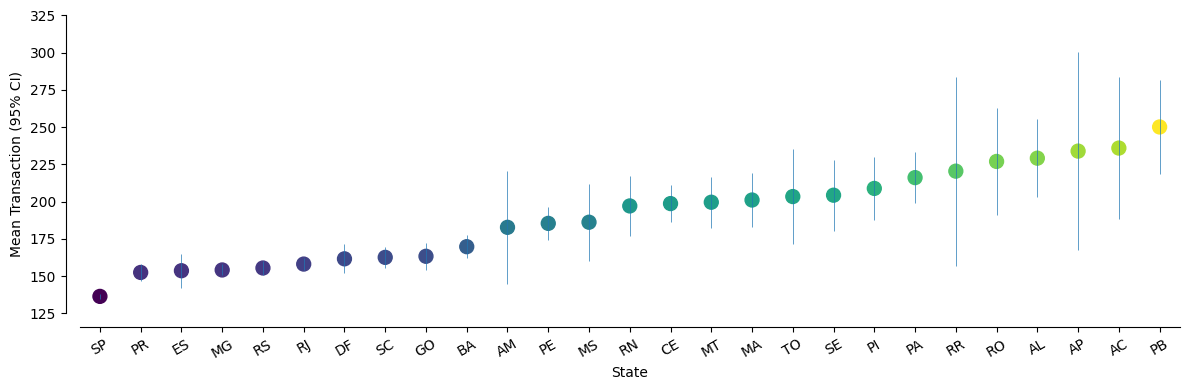

In [89]:
# Function to customize the plot design
def default_plot(ax, spines):
    ax = plt.gca()
    # Remove unnecessary axes and ticks (top and right)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()  # Position x-axis ticks at the bottom
    ax.get_yaxis().tick_left()     # Position y-axis ticks on the left

    # Set the ticks to face outward
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')

    # Loop through each spine and position them outward if specified
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # Move the spine outward by 10 points

    # Turn off ticks where there is no corresponding spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')

    if 'right' in spines:
        ax.yaxis.set_ticks_position('right')

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')

    return ax

# Sort customer regions by mean payment value for easier reading
plot = customer_regions.sort_values(by=('payment_value', 'mean'))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 4))
ax = default_plot(ax, ['left', 'bottom'])  # Apply the custom plot design
plt.xticks(rotation=30)  # Rotate x-axis labels for better visibility
plt.xlabel('State')  # Label for x-axis
plt.ylabel('Mean Transaction (95% CI)')  # Label for y-axis
plt.xlim(-0.5, 26.5)  # Set x-axis limits
plt.ylim(125, 325)  # Set y-axis limits

# Create scatter plot for mean payment values
plt.scatter(plot['customer_state'], plot['payment_value']['mean'], s=100, c=plot['payment_value']['mean'])
# Add vertical lines for the confidence interval
plt.vlines(plot['customer_state'], plot['ci_low'], plot['ci_hi'], lw=0.5)

# Adjust layout and save the plot to the specified directory
plt.tight_layout()
plt.savefig('/content/bismillah/data/product_probability_sum_custom.png', dpi=300)

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2